          
#         DATA BASED RECOMMENDATION FOR OLYMPIC SPONSORSHIP TO KELLOGG'S




> Kellogg's will be one of the main sponsors of the next Olympic games. They tasked us with an analysis of the athletes to select the right sport and athlete to sponsor.










---









#OBJECTIVE:
The primary objective of this project is to conduct a comprehensive analysis of historical Olympic data to assist Kellogg's in selecting the most suitable sport and athlete for sponsorship in the upcoming Olympic Games. Kellogg's is a renowned multinational food company specializing in breakfast cereals and other food products. It aims to maximize the impact of its sponsorship investment by aligning with a sport and athlete who not only have a significant presence on the global Olympic stage but also share values and characteristics that resonate with the brand's target audience. By harnessing the power of data analytics, this project aims to identify athletes with an impressive track record of success, thereby ensuring that Kellogg's sponsorship not only contributes to their marketing goals but also supports athletes' aspirations in achieving further success.

To achieve this objective, we will begin by collecting and cleaning historical Olympic data, which includes information on athletes, sports, and medal counts from various Olympic Games. We will then leverage the R programming language to perform data analysis and statistical modeling. One of the key metrics we will focus on is the total number of medals won by each athlete. By identifying athletes with the highest number of medals across different sports, we can pinpoint those who have consistently excelled on the Olympic stage, making them strong candidates for sponsorship consideration.

Based on the analysis of historical Olympic data, this project will conclude by providing Kellogg's with actionable recommendations and strategic insights. We will present a shortlist of athletes who meet the criteria of high medal counts and Olympic prominence. By offering a comprehensive evaluation, we will empower Kellogg's to make an informed decision regarding their sponsorship, ensuring a mutually beneficial partnership that resonates with the global audience and elevates both the brand and the chosen athlete during the next Olympic Games.

installtion of libraries needed

In [ ]:
library(dplyr)
library(ggplot2)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#1. Data Exploration


1.1 loading the data sets as df1 (contains main data) & df2(contains full names of region/countries for short forms used in df1) and merging them together to create data frame named 'data'

In [ ]:
df1 <- read.csv("/content/OLYMPICS.csv")
head(df1,3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA


In [ ]:
df2 <- read.csv("/content/noc_regions.csv")
head(df2,3)

,NOC,region,notes
,<chr>,<chr>,<chr>
1,AFG,Afghanistan,
2,AHO,Curacao,Netherlands Antilles
3,ALB,Albania,


In [ ]:
data <- merge(df1, df2, by="NOC")
head(data,3)

,NOC,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region,notes
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AFG,132181,Najam Yahya,M,NA,NA,NA,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,NA,Afghanistan,
2,AFG,87371,Ahmad Jahan Nuristani,M,NA,NA,NA,Afghanistan,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NA,Afghanistan,
3,AFG,44977,Mohammad Halilula,M,28,163,57,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NA,Afghanistan,


1.2 Display no of rows & columns in data set

In [ ]:
dim(data)

[1] 270767     17

1.3 Know names of the columns to know attributes of the data

In [ ]:
colnames(data)

[1] "NOC"    "ID"     "Name"   "Sex"    "Age"    "Height" "Weight" "Team"  
 [9] "Games"  "Year"   "Season" "City"   "Sport"  "Event"  "Medal"  "region"
[17] "notes"

1.4 Calculate  percentiles of numerical values in data set to gain more insight of the data. E.g. mean/median age of athelete

In [ ]:
summary(data)

     NOC                  ID             Name               Sex           
 Length:270767      Min.   :     1   Length:270767      Length:270767     
 Class :character   1st Qu.: 34630   Class :character   Class :character  
 Mode  :character   Median : 68187   Mode  :character   Mode  :character  
                    Mean   : 68229                                        
                    3rd Qu.:102066                                        
                    Max.   :135571                                        
                                                                          
      Age            Height          Weight           Team          
 Min.   :10.00   Min.   :127.0   Min.   : 25.00   Length:270767     
 1st Qu.:21.00   1st Qu.:168.0   1st Qu.: 60.00   Class :character  
 Median :24.00   Median :175.0   Median : 70.00   Mode  :character  
 Mean   :25.56   Mean   :175.3   Mean   : 70.71                     
 3rd Qu.:28.00   3rd Qu.:183.0   3rd Qu.: 79.00        

1.5 Some more information about the data set



In [ ]:
sports_names <- unique(data$Sport)
cat("Number of Sports:", length(sports_names), "\n")


Number of Sports: 66 


1.6 Confirming the names of medals

In [ ]:
medal_names <- unique(data$Medal)
print(medal_names)

[1] NA       "Bronze" "Silver" "Gold"  


1.7 To have glimpse of the data for better understanding

In [ ]:
glimpse(data)

Rows: 270,767
Columns: 17
$ NOC    <chr> "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", "AFG", …
$ ID     <int> 132181, 87371, 44977, 502, 109153, 29626, 1076, 121376, 80210, …
$ Name   <chr> "Najam Yahya", "Ahmad Jahan Nuristani", "Mohammad Halilula", "A…
$ Sex    <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M"…
$ Age    <int> NA, NA, 28, NA, 24, 28, 28, NA, NA, NA, 34, NA, 20, NA, 20, 25,…
$ Height <int> NA, NA, 163, NA, NA, 168, NA, NA, NA, NA, 168, NA, 178, NA, 178…
$ Weight <dbl> NA, NA, 57, NA, 74, 73, NA, NA, 57, NA, 111, NA, 74, NA, 68, NA…
$ Team   <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", "Af…
$ Games  <chr> "1956 Summer", "1948 Summer", "1980 Summer", "1956 Summer", "19…
$ Year   <int> 1956, 1948, 1980, 1956, 1964, 1960, 1936, 1956, 1972, 1956, 196…
$ Season <chr> "Summer", "Summer", "Summer", "Summer", "Summer", "Summer", "Su…
$ City   <chr> "Melbourne", "London", "Moskva", "Melbourne", "Tokyo", "Roma", …
$ Sport  <chr>

#2. One Column Selection

2. We will now look try to find names of the athelets who have won highest number of medals along with their sport & their region


In [ ]:
medals <- data[c("Name","Medal","region","Sport")]
head(medals,10)

,Name,Medal,region,Sport
,<chr>,<chr>,<chr>,<chr>
1,Najam Yahya,NA,Afghanistan,Hockey
2,Ahmad Jahan Nuristani,NA,Afghanistan,Hockey
3,Mohammad Halilula,NA,Afghanistan,Wrestling
4,Ahmad Shah Abouwi,NA,Afghanistan,Hockey
5,Shakar Khan Shakar,NA,Afghanistan,Wrestling
6,Sultan Mohammad Dost,NA,Afghanistan,Wrestling
7,Jammal-ud-Din Affendi,NA,Afghanistan,Hockey
8,Khan Nasrullah Totakhail,NA,Afghanistan,Hockey
9,Alam Mir,NA,Afghanistan,Wrestling


In [ ]:
no_of_medals <- medals %>% drop_na(Medal)
head(no_of_medals)

,Name,Medal,region,Sport
,<chr>,<chr>,<chr>,<chr>
1,Rohullah Nikpai,Bronze,Afghanistan,Taekwondo
2,Rohullah Nikpai,Bronze,Afghanistan,Taekwondo
3,Jan D. Boersma,Silver,Curacao,Sailing
4,Hocine Soltani,Bronze,Algeria,Boxing
5,Taoufik Makhloufi,Silver,Algeria,Athletics
6,Hassiba Boulmerka,Gold,Algeria,Athletics


DELETE :arranging names of the atheletes who have highest medal tally


In [ ]:
medal_total <- medals %>% group_by(Name,region, Sport)%>%summarize(Total_Medals = n())%>%arrange(desc(Total_Medals))%>%head(n=20)

head(medal_total,30)

`summarise()` has grouped output by 'Name', 'region'. You can override using
the `.groups` argument.


Name,region,Sport,Total_Medals
<chr>,<chr>,<chr>,<int>
Robert Tait McKenzie,Canada,Art Competitions,58
Heikki Ilmari Savolainen,Finland,Gymnastics,39
"Joseph ""Josy"" Stoffel",Luxembourg,Gymnastics,38
Ioannis Theofilakis,Greece,Shooting,36
Alexandros Theofilakis,Greece,Shooting,32
Andreas Wecker,Germany,Gymnastics,32
Jean Lucien Nicolas Jacoby,Luxembourg,Art Competitions,32
Takashi Ono,Japan,Gymnastics,32
"Alfred August ""Al"" Jochim",USA,Gymnastics,31


We will also find out top countries with highest no of medals won so far in descending order

In [ ]:

medal_total <- medals %>% group_by(region,)%>%summarize(Medal = n())%>%arrange(desc(Medal))%>%head(n=10)

head(medal_total)


region,Medal
<chr>,<int>
USA,18853
Germany,15883
France,12758
UK,12256
Russia,11692
Italy,10715


Probing the data

In [ ]:
data1 <- data[c('region','Name','Sex','Sport', 'Medal')]|> drop_na(Medal)
head(data1)

,region,Name,Sex,Sport,Medal
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,Rohullah Nikpai,M,Taekwondo,Bronze
2,Afghanistan,Rohullah Nikpai,M,Taekwondo,Bronze
3,Curacao,Jan D. Boersma,M,Sailing,Silver
4,Algeria,Hocine Soltani,M,Boxing,Bronze
5,Algeria,Taoufik Makhloufi,M,Athletics,Silver
6,Algeria,Hassiba Boulmerka,F,Athletics,Gold


In [ ]:
Athelete <- data[c("Sex", "Age","Height", "Weight","Medal")]
#head(Athelete)

#Getting data of atheletes which have won the medals by dropping NA values from the Medal column

Athelete[!is.na(Athelete$Medal), ]
#head(Athelete,5)
#summary(Athelete)

H_W = Athelete%>% drop_na("Height", "Weight", "Medal")
head(H_W,5)

,Sex,Age,Height,Weight,Medal
,<chr>,<int>,<int>,<dbl>,<chr>
46,M,21,183,63,Bronze
115,M,25,183,63,Bronze
137,M,19,NA,NA,Silver
276,M,19,165,60,Bronze
295,M,28,170,67,Silver
304,F,24,158,49,Gold
335,M,28,170,67,Silver
352,M,23,165,60,Gold
415,M,24,170,67,Gold


,Sex,Age,Height,Weight,Medal
,<chr>,<int>,<int>,<dbl>,<chr>
1,M,21,183,63,Bronze
2,M,25,183,63,Bronze
3,M,19,165,60,Bronze
4,M,28,170,67,Silver
5,F,24,158,49,Gold


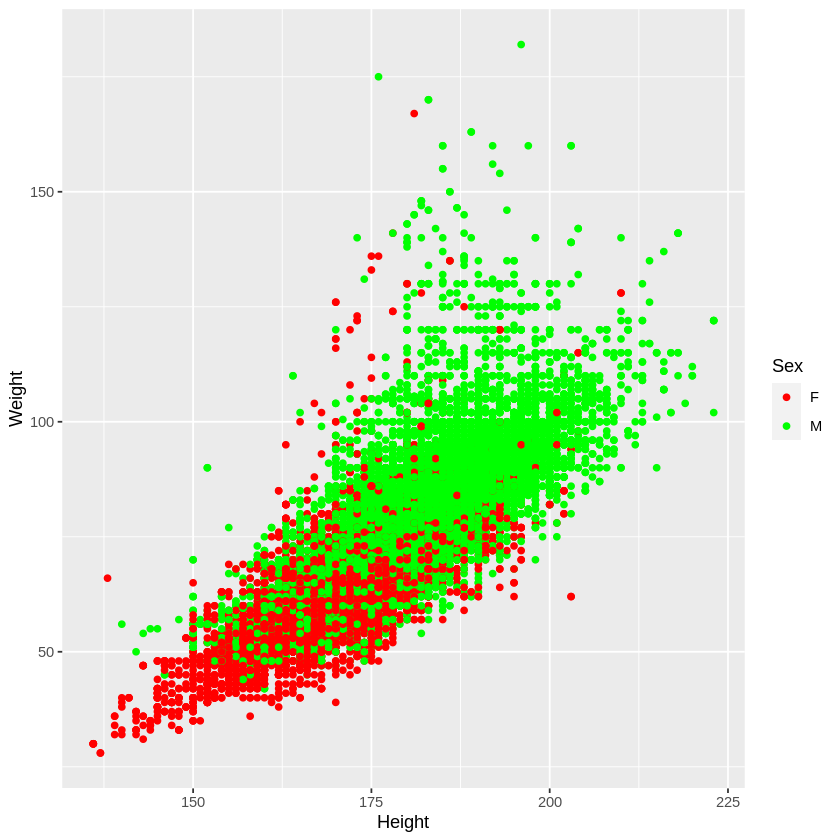

In [ ]:
ggplot(H_W,aes(x=Height,y=Weight,group=Sex))+
   geom_point(aes(color=Sex))+
   scale_color_manual(values=c('Red','Green'))

In [ ]:
head(medal_total)

region,Medal
<chr>,<int>
USA,18853
Germany,15883
France,12758
UK,12256
Russia,11692
Italy,10715


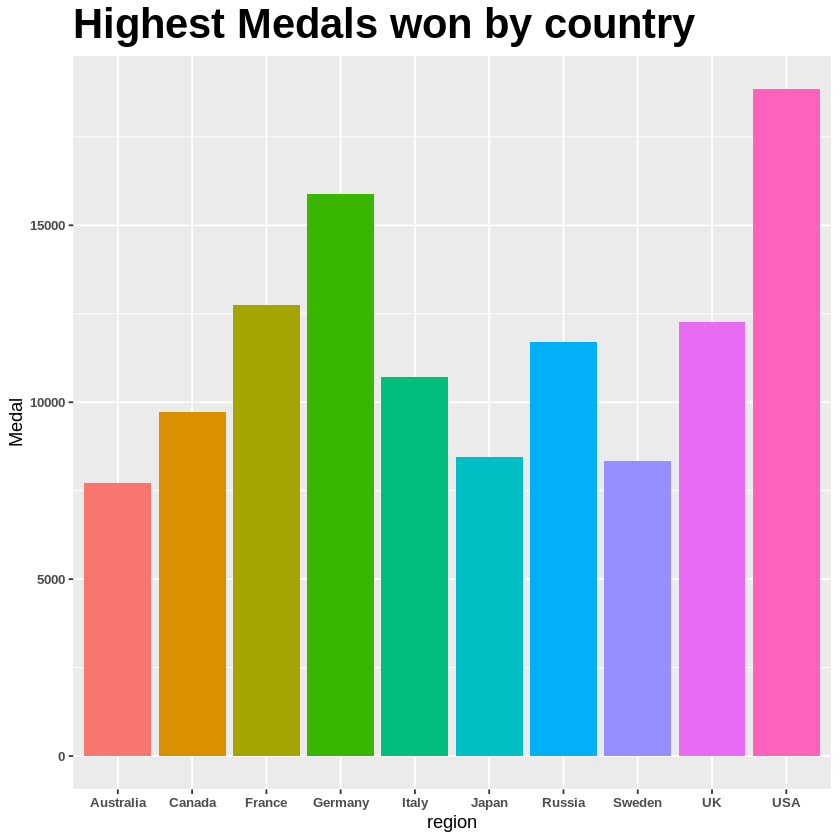

In [ ]:
#Plotting bar chart for Brazil when it is hosting vs not hosting
library(ggplot2)

# Create a bar chart using ggplot2
ggplot(medal_total, aes(x = region, y = Medal, fill = region)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Medal", x = "region", y = "Medal") +
  theme(legend.position = "none",
                     axis.text = element_text(size = 8,face="bold"),
        plot.title = element_text(size=25,face = "bold")) +
  ggtitle("Highest Medals won by country")


In [ ]:
Athlete_names <- data1%>% group_by(Name,Sex,Sport,region) %>% summarize(Medal = n())%>% arrange(desc(Medal))%>%head(n=4)
head(Athlete_names,5)

`summarise()` has grouped output by 'Name', 'Sex', 'Sport'. You can override
using the `.groups` argument.


Name,Sex,Sport,region,Medal
<chr>,<chr>,<chr>,<chr>,<int>
"Michael Fred Phelps, II",M,Swimming,USA,28
Larysa Semenivna Latynina (Diriy-),F,Gymnastics,Russia,18
Nikolay Yefimovich Andrianov,M,Gymnastics,Russia,15
Borys Anfiyanovych Shakhlin,M,Gymnastics,Russia,13


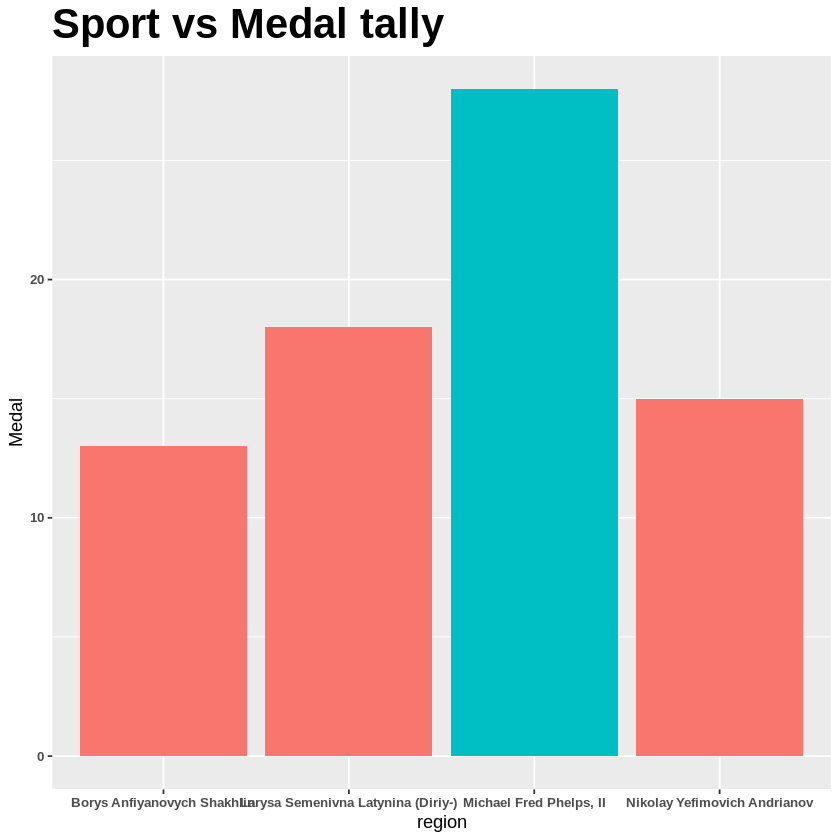

In [ ]:

library(ggplot2)

# Create a bar chart using ggplot2
ggplot(Athlete_names, aes(x = Name, y = Medal, fill = Sport)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Medal", x = "region", y = "Medal") +
  theme(legend.position = "none",
                     axis.text = element_text(size = 8,face="bold"),
        plot.title = element_text(size=25,face = "bold")) +
  ggtitle("Sport vs Medal tally")


#Summary

We have used a dataset of history of 120 years of olymics & was downloaded from keggle.com.
From the above data analysis, it is found that country wise approach in finding athelete may not be fruitful since there are more than 10,000 medals won in top countries like USA, Russia, Germany etc. Selecting an athelete may not give exclusivity that is necessary in branding.
Other criterias like sex, height, weight of athelete can not be given due consideration since they vary too much to draw meaningful insights.
We therefore analyse and generate the data of athelets with the highest number of medal tally. & we can logically infer that these names represent the highest amount of efforts needed to excel at highest level repeatedly. They are therefore difficult to substitute.

#Recommendations

In [ ]:
Athlete_names

Name,Sex,Sport,region,Medal
<chr>,<chr>,<chr>,<chr>,<int>
"Michael Fred Phelps, II",M,Swimming,USA,28
Larysa Semenivna Latynina (Diriy-),F,Gymnastics,Russia,18
Nikolay Yefimovich Andrianov,M,Gymnastics,Russia,15
Borys Anfiyanovych Shakhlin,M,Gymnastics,Russia,13


We therefore recommend the set of 4 atheletes to choose from to get sponsored by Kellogg's because they have proved themselves repeatedly at highest level of the games. They therefore provide unique mix of popularity, exclusivity & eternity which suits the brand Kellogg's in terms of gaining more sales & popularity besides more probablity to win a medal again !